In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# 전국 평균 기온 전처리

In [3]:
# 2012~2021년 각 월별 평균 기온 데이터
avg_temperature = pd.read_csv('./data/2012-2021기온.csv', encoding='utf-8')

In [4]:
avg_temperature

,년월,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2012-01-01,전국,-1.5,-6.2,3.6
1,2012-02-01,전국,-1.1,-6.2,4.5
2,2012-03-01,전국,5.4,0.7,10.4
3,2012-04-01,전국,12.4,6.4,18.7
4,2012-05-01,전국,18.1,12.6,24.4
...,...,...,...,...,...
115,2021-08-01,전국,24.8,21.5,29.2
116,2021-09-01,전국,21.3,17.7,25.8
117,2021-10-01,전국,15.1,10.4,21.2
118,2021-11-01,전국,8.3,3.3,14.5


In [5]:
avg_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   년월       120 non-null    object 
 1   지점       120 non-null    object 
 2   평균기온(℃)  120 non-null    float64
 3   최저기온(℃)  120 non-null    float64
 4   최고기온(℃)  120 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.8+ KB


In [6]:
avg_temperature.rename(columns={'년월':'date','평균기온(℃)':'평균기온','최저기온(℃)':'최저기온','최고기온(℃)':'최고기온'}, inplace=True)

In [7]:
avg_temperature.drop(columns='지점',inplace=True)

In [8]:
avg_temperature['date'] = pd.to_datetime(avg_temperature['date'])

In [9]:
avg_temperature

,date,평균기온,최저기온,최고기온
0,2012-01-01,-1.5,-6.2,3.6
1,2012-02-01,-1.1,-6.2,4.5
2,2012-03-01,5.4,0.7,10.4
3,2012-04-01,12.4,6.4,18.7
4,2012-05-01,18.1,12.6,24.4
...,...,...,...,...
115,2021-08-01,24.8,21.5,29.2
116,2021-09-01,21.3,17.7,25.8
117,2021-10-01,15.1,10.4,21.2
118,2021-11-01,8.3,3.3,14.5


In [10]:
# 월초로 되어있는 날짜를 월말로 바꿈
avg_temperature['date'] = avg_temperature['date'] + pd.offsets.MonthEnd(0) 

In [11]:
avg_temperature

,date,평균기온,최저기온,최고기온
0,2012-01-31,-1.5,-6.2,3.6
1,2012-02-29,-1.1,-6.2,4.5
2,2012-03-31,5.4,0.7,10.4
3,2012-04-30,12.4,6.4,18.7
4,2012-05-31,18.1,12.6,24.4
...,...,...,...,...
115,2021-08-31,24.8,21.5,29.2
116,2021-09-30,21.3,17.7,25.8
117,2021-10-31,15.1,10.4,21.2
118,2021-11-30,8.3,3.3,14.5


In [12]:
avg_temperature.to_csv('./pre_data/월별_전국_평균기온.csv')

# 닭고기 가격 전처리(월별/일별)

In [13]:
chicken_price = pd.read_csv('./data/닭고기시세20120101_20211231.csv')
chicken_price

,date,day,5-6scale,7-8scale,9-10scale,11scale,12scale,13-16scale,닭고기 평균 가격
0,2021-12-31,Fri,"4,600","4,402","4,077","3,915","3,669","3,621","4,047"
1,2021-12-30,Thr,"4,600","4,402","4,077","3,915","3,669","3,621","4,047"
2,2021-12-29,Wed,"4,433","4,244","3,923","3,768","3,524","3,479","3,895"
3,2021-12-28,Tue,"4,433","4,244","3,923","3,768","3,524","3,479","3,895"
4,2021-12-27,Mon,"4,267","4,085","3,769","3,621","3,379","3,336","3,743"
...,...,...,...,...,...,...,...,...,...
2991,2012-01-06,Fri,"3,583","3,434","3,138","3,018","2,930","2,893","3,166"
2992,2012-01-05,Thr,"3,583","3,434","3,138","3,018","2,785","2,750","3,118"
2993,2012-01-04,Wed,"3,583","3,434","3,138","3,018","2,785","2,750","3,118"
2994,2012-01-03,Tue,"3,583","3,434","3,138","3,018","2,785","2,750","3,118"


In [14]:
chicken_price.rename(columns={'닭고기 평균 가격':'price'}, inplace=True)

In [15]:
# type을 str에서 datetime으로 바꿈
chicken_price['date'] = pd.to_datetime(chicken_price['date'])

In [16]:
# 닭고기 가격을 str에서 int로 바꿈
chicken_price['price'] =  chicken_price['price'].str.replace(',','')
chicken_price['price'] = pd.to_numeric(chicken_price['price'])

In [17]:
chicken_price.set_index(pd.DatetimeIndex(chicken_price['date'])).drop('date',axis=1)

,day,5-6scale,7-8scale,9-10scale,11scale,12scale,13-16scale,price
date,,,,,,,,
2021-12-31,Fri,"4,600","4,402","4,077","3,915","3,669","3,621",4047
2021-12-30,Thr,"4,600","4,402","4,077","3,915","3,669","3,621",4047
2021-12-29,Wed,"4,433","4,244","3,923","3,768","3,524","3,479",3895
2021-12-28,Tue,"4,433","4,244","3,923","3,768","3,524","3,479",3895
2021-12-27,Mon,"4,267","4,085","3,769","3,621","3,379","3,336",3743
...,...,...,...,...,...,...,...,...
2012-01-06,Fri,"3,583","3,434","3,138","3,018","2,930","2,893",3166
2012-01-05,Thr,"3,583","3,434","3,138","3,018","2,785","2,750",3118
2012-01-04,Wed,"3,583","3,434","3,138","3,018","2,785","2,750",3118


In [18]:
monthly_chicken_price = chicken_price.resample('M',on='date').mean()
monthly_chicken_price

,price
date,
2012-01-31,3202.625000
2012-02-29,3668.000000
2012-03-31,4169.884615
2012-04-30,3399.280000
2012-05-31,3255.560000
...,...
2021-08-31,3505.200000
2021-09-30,3074.043478
2021-10-31,3913.782609


In [19]:
# price를 float에서 int로 바꿈
monthly_chicken_price['price'] = monthly_chicken_price['price'].astype('int')

In [20]:
monthly_chicken_price = monthly_chicken_price.reset_index()

In [21]:
monthly_chicken_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    120 non-null    datetime64[ns]
 1   price   120 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.5 KB


In [22]:
monthly_chicken_price.to_csv('./pre_data/월별_닭고기가격.csv')

In [23]:
chicken_price = chicken_price[['date','price']]
chicken_price

,date,price
0,2021-12-31,4047
1,2021-12-30,4047
2,2021-12-29,3895
3,2021-12-28,3895
4,2021-12-27,3743
...,...,...
2991,2012-01-06,3166
2992,2012-01-05,3118
2993,2012-01-04,3118
2994,2012-01-03,3118


In [24]:
chicken_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2996 non-null   datetime64[ns]
 1   price   2996 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 46.9 KB


In [25]:
chicken_price.to_csv('./pre_data/일별_닭고기가격.csv')

In [26]:
avg_temperature

,date,평균기온,최저기온,최고기온
0,2012-01-31,-1.5,-6.2,3.6
1,2012-02-29,-1.1,-6.2,4.5
2,2012-03-31,5.4,0.7,10.4
3,2012-04-30,12.4,6.4,18.7
4,2012-05-31,18.1,12.6,24.4
...,...,...,...,...
115,2021-08-31,24.8,21.5,29.2
116,2021-09-30,21.3,17.7,25.8
117,2021-10-31,15.1,10.4,21.2
118,2021-11-30,8.3,3.3,14.5


# 일별 기온 데이터 전처리

In [27]:
temperature_daily = pd.read_csv('./data/2012-2021 기온 daily.csv')
temperature_daily

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t2012-01-01,전국,-0.3,-4.7,3.8
1,\t2012-01-02,전국,-2.8,-7.5,2.6
2,\t2012-01-03,전국,-1.9,-5.8,2.8
3,\t2012-01-04,전국,-4.0,-6.6,-1.0
4,\t2012-01-05,전국,-4.1,-8.7,1.5
...,...,...,...,...,...
3649,\t2021-12-28,전국,0.0,-5.2,4.9
3650,\t2021-12-29,전국,2.5,-2.5,7.5
3651,\t2021-12-30,전국,-0.7,-3.3,2.7
3652,\t2021-12-31,전국,-3.9,-7.2,0.1


In [28]:
temperature_daily['날짜'] = temperature_daily['날짜'].str.replace('\t', '')
temperature_daily

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2012-01-01,전국,-0.3,-4.7,3.8
1,2012-01-02,전국,-2.8,-7.5,2.6
2,2012-01-03,전국,-1.9,-5.8,2.8
3,2012-01-04,전국,-4.0,-6.6,-1.0
4,2012-01-05,전국,-4.1,-8.7,1.5
...,...,...,...,...,...
3649,2021-12-28,전국,0.0,-5.2,4.9
3650,2021-12-29,전국,2.5,-2.5,7.5
3651,2021-12-30,전국,-0.7,-3.3,2.7
3652,2021-12-31,전국,-3.9,-7.2,0.1


In [29]:
temperature_daily.isnull().sum()

날짜         0
지점         1
평균기온(℃)    1
최저기온(℃)    1
최고기온(℃)    1
dtype: int64

In [30]:
temperature_daily.dropna(axis=0,inplace=True)
temperature_daily

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2012-01-01,전국,-0.3,-4.7,3.8
1,2012-01-02,전국,-2.8,-7.5,2.6
2,2012-01-03,전국,-1.9,-5.8,2.8
3,2012-01-04,전국,-4.0,-6.6,-1.0
4,2012-01-05,전국,-4.1,-8.7,1.5
...,...,...,...,...,...
3648,2021-12-27,전국,-4.6,-11.2,0.5
3649,2021-12-28,전국,0.0,-5.2,4.9
3650,2021-12-29,전국,2.5,-2.5,7.5
3651,2021-12-30,전국,-0.7,-3.3,2.7


In [31]:
temperature_daily.rename(columns={'날짜':'date', '평균기온(℃)':'평균기온','최저기온(℃)':'최저기온','최고기온(℃)':'최고기온'},inplace=True)
temperature_daily

,date,지점,평균기온,최저기온,최고기온
0,2012-01-01,전국,-0.3,-4.7,3.8
1,2012-01-02,전국,-2.8,-7.5,2.6
2,2012-01-03,전국,-1.9,-5.8,2.8
3,2012-01-04,전국,-4.0,-6.6,-1.0
4,2012-01-05,전국,-4.1,-8.7,1.5
...,...,...,...,...,...
3648,2021-12-27,전국,-4.6,-11.2,0.5
3649,2021-12-28,전국,0.0,-5.2,4.9
3650,2021-12-29,전국,2.5,-2.5,7.5
3651,2021-12-30,전국,-0.7,-3.3,2.7


In [32]:
temperature_daily.drop(columns='지점',inplace=True)

In [33]:
temperature_daily['date'] = pd.to_datetime(temperature_daily['date'])

In [34]:
temperature_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3653 non-null   datetime64[ns]
 1   평균기온    3653 non-null   float64       
 2   최저기온    3653 non-null   float64       
 3   최고기온    3653 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 142.7 KB


In [35]:
temperature_daily.to_csv('./pre_data/일별_전국_평균기온.csv')

# 13도 이상, 25도 미만 기온 데이터 전처리

In [36]:
# 월별 13도 미만
under_13 = avg_temperature[avg_temperature['평균기온'] < 13]
under_13.to_csv('./pre_data/월별_13도_미만_기온.csv')

In [37]:
# 월별 25도 이상
over_25 = avg_temperature[avg_temperature['평균기온'] > 25]
over_25.to_csv('./pre_data/월별_25도_이상_기온.csv')

In [38]:
# 월별 13도 미만
under_13_daily = temperature_daily[temperature_daily['평균기온'] < 13]
under_13_daily.to_csv('./pre_data/일별_13도_미만_기온.csv')

In [39]:
# 월별 25도 이상
over_25 = temperature_daily[temperature_daily['평균기온'] > 25]
over_25.to_csv('./pre_data/일별_25도_이상_기온.csv')

# 닭고기 수입량 데이터 전처리

In [40]:
import_amount = pd.read_csv('./data/닭고기수입량(2012_2022).csv')
import_amount

,date,import amount
0,2012-01-31,8754.0
1,2012-02-29,10098.0
2,2012-03-31,10836.0
3,2012-04-30,13412.0
4,2012-05-31,14519.0
...,...,...
115,2021-08-31,9360.0
116,2021-09-30,9009.0
117,2021-10-31,12005.0
118,2021-11-30,10025.0


In [41]:
import_amount['date'] = pd.to_datetime(import_amount['date'])
import_amount['import amount'] = import_amount['import amount'].astype('int')

In [42]:
import_amount.to_csv('./pre_data/월별_닭고기_수입량.csv')

# 폭염, 한파 데이터 처리

In [43]:
hot_price = pd.read_csv('./data/2012_2021폭염일수.csv')
cold_price = pd.read_csv('./data/2012_2021한파일수.csv')

In [44]:
hot_price['date'] = pd.to_datetime(hot_price['date'])
hot_price['hot_day'] = hot_price['hot_day'].astype('int')

In [45]:
hot_price

,date,hot_day
0,2012-01-31,0
1,2012-02-29,0
2,2012-03-31,0
3,2012-04-30,0
4,2012-05-31,0
...,...,...
115,2021-08-31,3
116,2021-09-30,0
117,2021-10-31,0
118,2021-11-30,0


In [46]:
cold_price['date'] = pd.to_datetime(cold_price['date'])
cold_price['cold_day'] = cold_price['cold_day'].astype('int')

In [47]:
cold_price

,date,cold_day
0,2012-01-31,4
1,2012-02-29,3
2,2012-03-31,0
3,2012-04-30,0
4,2012-05-31,0
...,...,...
115,2021-08-31,0
116,2021-09-30,0
117,2021-10-31,0
118,2021-11-30,0


In [48]:
hot_price = hot_price[hot_price['hot_day'] > 0]
hot_price.reset_index(drop=True)
hot_price.to_csv('./pre_data/월별_폭염있는달.csv')

In [49]:
cold_price = cold_price[cold_price['cold_day'] > 0]
cold_price.reset_index(drop=True)
cold_price.to_csv('./pre_data/월별_한파있는달.csv')

# 병아리 가격 데이터 전처리

In [50]:
chick_price = pd.read_csv('./data/병아리_가격.csv')
chick_price

,date,병아리(원/수)
0,2012-01-02,300
1,2012-01-03,300
2,2012-01-04,300
3,2012-01-05,200
4,2012-01-06,200
...,...,...
2990,2021-12-27,400
2991,2021-12-28,400
2992,2021-12-29,400
2993,2021-12-30,400


In [51]:
chick_price['date'] = pd.to_datetime(chick_price['date'])

In [52]:
chick_price['병아리(원/수)'] = chick_price['병아리(원/수)'].astype('int')

In [53]:
chick_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2995 non-null   datetime64[ns]
 1   병아리(원/수)  2995 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 35.2 KB


In [54]:
chick_price.to_csv('./pre_data/일별_병아리가격.csv')

In [55]:
chick_price.set_index(pd.DatetimeIndex(chick_price['date'])).drop('date',axis=1)

,병아리(원/수)
date,
2012-01-02,300
2012-01-03,300
2012-01-04,300
2012-01-05,200
2012-01-06,200
...,...
2021-12-27,400
2021-12-28,400
2021-12-29,400


In [56]:
monthly_chick_price = chick_price.resample('M',on='date').mean()
monthly_chick_price

,병아리(원/수)
date,
2012-01-31,250.000000
2012-02-29,420.000000
2012-03-31,500.000000
2012-04-30,332.000000
2012-05-31,200.000000
...,...
2021-08-31,312.000000
2021-09-30,408.695652
2021-10-31,447.826087


In [57]:
# price를 float에서 int로 바꿈
monthly_chick_price['병아리(원/수)'] = monthly_chick_price['병아리(원/수)'].astype('int')

In [58]:
monthly_chick_price

,병아리(원/수)
date,
2012-01-31,250
2012-02-29,420
2012-03-31,500
2012-04-30,332
2012-05-31,200
...,...
2021-08-31,312
2021-09-30,408
2021-10-31,447


In [59]:
monthly_chick_price = monthly_chick_price.reset_index()

In [60]:
monthly_chick_price.to_csv('./pre_data/월별_병아리가격.csv')

# 데이터 통합

## 월별 데이터 통합

In [61]:
# 월별 데이터 통합
monthly_under_13 = pd.read_csv('./pre_data/월별_13도_미만_기온.csv')
monthly_over_25 = pd.read_csv('./pre_data/월별_25도_이상_기온.csv')
monthly_chicken_import = pd.read_csv('./pre_data/월별_닭고기_수입량.csv')
monthly_chicken = pd.read_csv('./pre_data/월별_닭고기가격.csv')
monthly_chick = pd.read_csv('./pre_data/월별_병아리가격.csv')
monthly_feed = pd.read_csv('./pre_data/월별_사료값.csv') 
monthly_oil = pd.read_csv('./pre_data/월별_원유가격.csv')
monthly_temp = pd.read_csv('./pre_data/월별_전국_평균기온.csv')
monthly_breeding = pd.read_csv('./pre_data/월별_종계입식현황.csv')
monthly_hot = pd.read_csv('./pre_data/월별_폭염있는달.csv')
monthly_cold = pd.read_csv('./pre_data/월별_한파있는달.csv')
monthly_kill = pd.read_csv('./pre_data/월별_도축건수.csv')

In [62]:
dfs = [monthly_chicken, monthly_chick, monthly_temp, monthly_under_13, monthly_over_25, monthly_hot, monthly_cold, monthly_chicken_import, monthly_feed, monthly_oil, monthly_breeding, monthly_kill]

import functools as ft
df_m_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\3612511076.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_m_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)
C:\Users\admin\AppData\Local\Temp\ipykernel_9096\3612511076.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_m_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)
C:\Users\admin\AppData\Local\Temp\ipykernel_9096\3612511076.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_m_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)
C:\Users\admin\AppData\Local\Temp\ipykernel_90

In [63]:
df_m_final

,Unnamed: 0_x,date,price,Unnamed: 0_y,병아리(원/수),Unnamed: 0_x,평균기온_x,최저기온_x,최고기온_x,Unnamed: 0_y,...,feedprice,Unnamed: 0_y,Dubai,Brent,WTI,oil_avg,Unnamed: 0_x,count,Unnamed: 0_y,도축
0,0,2012-01-31,3202,0,250,0,-1.5,-6.2,3.6,0.0,...,533.6,0,109.456667,111.452381,100.289286,107.066111,0,356,0,58873
1,1,2012-02-29,3668,1,420,1,-1.1,-6.2,4.5,1.0,...,529.9,1,116.180952,119.060000,102.370952,112.537302,1,672,1,55879
2,2,2012-03-31,4169,2,500,2,5.4,0.7,10.4,2.0,...,527.9,2,122.487273,124.544545,106.205000,117.745606,2,870,2,58750
3,3,2012-04-30,3399,3,332,3,12.4,6.4,18.7,3.0,...,526.3,3,117.338500,120.486500,103.346000,113.723667,3,718,3,60940
4,4,2012-05-31,3255,4,200,4,18.1,12.6,24.4,NaN,...,526.2,4,107.719348,110.288696,94.546087,104.184710,4,496,4,73505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2021-08-31,3505,115,312,115,24.8,21.5,29.2,NaN,...,492.0,115,69.518864,70.513636,67.711364,69.247955,115,670,115,89892
116,116,2021-09-30,3074,116,408,116,21.3,17.7,25.8,NaN,...,503.0,116,72.628182,74.876364,71.420909,72.975152,116,479,116,81026
117,117,2021-10-31,3913,117,447,117,15.1,10.4,21.2,NaN,...,508.0,117,81.610952,83.746190,81.222857,82.193333,117,591,117,81228
118,118,2021-11-30,2985,118,315,118,8.3,3.3,14.5,118.0,...,520.0,118,80.317500,80.849545,78.409091,79.858712,118,652,118,86819


In [64]:
df_m_final.columns

Index(['Unnamed: 0_x', 'date', 'price', 'Unnamed: 0_y', '병아리(원/수)',
       'Unnamed: 0_x', '평균기온_x', '최저기온_x', '최고기온_x', 'Unnamed: 0_y', '평균기온_y',
       '최저기온_y', '최고기온_y', 'Unnamed: 0_x', '평균기온', '최저기온', '최고기온',
       'Unnamed: 0_y', 'hot_day', 'Unnamed: 0_x', 'cold_day', 'Unnamed: 0_y',
       'import amount', 'Unnamed: 0_x', 'feedprice', 'Unnamed: 0_y', 'Dubai',
       'Brent', 'WTI', 'oil_avg', 'Unnamed: 0_x', 'count', 'Unnamed: 0_y',
       '도축'],
      dtype='object')

In [65]:
df_m_final.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],inplace=True)

In [66]:
df_m_final.columns

Index(['date', 'price', '병아리(원/수)', '평균기온_x', '최저기온_x', '최고기온_x', '평균기온_y',
       '최저기온_y', '최고기온_y', '평균기온', '최저기온', '최고기온', 'hot_day', 'cold_day',
       'import amount', 'feedprice', 'Dubai', 'Brent', 'WTI', 'oil_avg',
       'count', '도축'],
      dtype='object')

In [67]:
df_m_final

,date,price,병아리(원/수),평균기온_x,최저기온_x,최고기온_x,평균기온_y,최저기온_y,최고기온_y,평균기온,...,hot_day,cold_day,import amount,feedprice,Dubai,Brent,WTI,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,-6.2,3.6,-1.5,-6.2,3.6,NaN,...,NaN,4.0,8754,533.6,109.456667,111.452381,100.289286,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,-6.2,4.5,-1.1,-6.2,4.5,NaN,...,NaN,3.0,10098,529.9,116.180952,119.060000,102.370952,112.537302,672,55879
2,2012-03-31,4169,500,5.4,0.7,10.4,5.4,0.7,10.4,NaN,...,NaN,NaN,10836,527.9,122.487273,124.544545,106.205000,117.745606,870,58750
3,2012-04-30,3399,332,12.4,6.4,18.7,12.4,6.4,18.7,NaN,...,NaN,NaN,13412,526.3,117.338500,120.486500,103.346000,113.723667,718,60940
4,2012-05-31,3255,200,18.1,12.6,24.4,NaN,NaN,NaN,NaN,...,NaN,NaN,14519,526.2,107.719348,110.288696,94.546087,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,24.8,21.5,29.2,NaN,NaN,NaN,NaN,...,3.0,NaN,9360,492.0,69.518864,70.513636,67.711364,69.247955,670,89892
116,2021-09-30,3074,408,21.3,17.7,25.8,NaN,NaN,NaN,NaN,...,NaN,NaN,9009,503.0,72.628182,74.876364,71.420909,72.975152,479,81026
117,2021-10-31,3913,447,15.1,10.4,21.2,NaN,NaN,NaN,NaN,...,NaN,NaN,12005,508.0,81.610952,83.746190,81.222857,82.193333,591,81228
118,2021-11-30,2985,315,8.3,3.3,14.5,8.3,3.3,14.5,NaN,...,NaN,NaN,10025,520.0,80.317500,80.849545,78.409091,79.858712,652,86819


In [68]:
df_m_final = df_m_final.rename(columns={'price':'닭고기가격',
                                    '평균기온_x':'일별_평균기온','최저기온_x':'일별_최저기온','최고기온_x':'일별_최고기온',
                                    '평균기온_y':'13도미만_평균기온','최저기온_y':'13도미만_최저기온','최고기온_y':'13도미만_최고기온',
                                    '평균기온': '25도이상_평균기온', '최저기온':'25도이상_최저기온', '최고기온':'25도이상_최고기온'})

In [69]:
df_m_final

,date,닭고기가격,병아리(원/수),일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,...,hot_day,cold_day,import amount,feedprice,Dubai,Brent,WTI,oil_avg,count,도축
0,2012-01-31,3202,250,-1.5,-6.2,3.6,-1.5,-6.2,3.6,NaN,...,NaN,4.0,8754,533.6,109.456667,111.452381,100.289286,107.066111,356,58873
1,2012-02-29,3668,420,-1.1,-6.2,4.5,-1.1,-6.2,4.5,NaN,...,NaN,3.0,10098,529.9,116.180952,119.060000,102.370952,112.537302,672,55879
2,2012-03-31,4169,500,5.4,0.7,10.4,5.4,0.7,10.4,NaN,...,NaN,NaN,10836,527.9,122.487273,124.544545,106.205000,117.745606,870,58750
3,2012-04-30,3399,332,12.4,6.4,18.7,12.4,6.4,18.7,NaN,...,NaN,NaN,13412,526.3,117.338500,120.486500,103.346000,113.723667,718,60940
4,2012-05-31,3255,200,18.1,12.6,24.4,NaN,NaN,NaN,NaN,...,NaN,NaN,14519,526.2,107.719348,110.288696,94.546087,104.184710,496,73505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2021-08-31,3505,312,24.8,21.5,29.2,NaN,NaN,NaN,NaN,...,3.0,NaN,9360,492.0,69.518864,70.513636,67.711364,69.247955,670,89892
116,2021-09-30,3074,408,21.3,17.7,25.8,NaN,NaN,NaN,NaN,...,NaN,NaN,9009,503.0,72.628182,74.876364,71.420909,72.975152,479,81026
117,2021-10-31,3913,447,15.1,10.4,21.2,NaN,NaN,NaN,NaN,...,NaN,NaN,12005,508.0,81.610952,83.746190,81.222857,82.193333,591,81228
118,2021-11-30,2985,315,8.3,3.3,14.5,8.3,3.3,14.5,NaN,...,NaN,NaN,10025,520.0,80.317500,80.849545,78.409091,79.858712,652,86819


In [70]:
df_m_final.to_csv('./pre_data/월별_통합.csv')

In [73]:
corr_m_data = df_m_final.corr()
corr_m_data

,닭고기가격,병아리(원/수),일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,25도이상_최저기온,...,hot_day,cold_day,import amount,feedprice,Dubai,Brent,WTI,oil_avg,count,도축
닭고기가격,1.000000,0.445516,-0.071255,-0.072010,-0.069827,-0.106500,-0.132917,-0.094504,0.392990,0.386785,...,0.464129,-0.208901,0.003005,0.463440,0.410019,0.413322,0.418762,0.415093,0.038797,-0.403027
병아리(원/수),0.445516,1.000000,-0.185722,-0.203258,-0.167268,0.114208,0.069330,0.148884,0.081420,-0.223605,...,0.203315,-0.258927,0.191645,-0.212049,-0.115492,-0.115758,-0.100364,-0.111327,0.184980,-0.325786
일별_평균기온,-0.071255,-0.185722,1.000000,0.996439,0.996775,1.000000,0.991292,0.994532,1.000000,0.766404,...,0.700902,-0.877259,0.059276,0.046208,0.001352,-0.003556,0.038679,0.011010,0.312383,0.551546
일별_최저기온,-0.072010,-0.203258,0.996439,1.000000,0.986837,0.991292,1.000000,0.973859,0.766404,1.000000,...,0.578776,-0.886521,0.053478,0.050635,0.002409,-0.002703,0.040341,0.012183,0.284507,0.560750
일별_최고기온,-0.069827,-0.167268,0.996775,0.986837,1.000000,0.994532,0.973859,1.000000,0.904810,0.428635,...,0.841217,-0.800657,0.065036,0.042113,0.001010,-0.003955,0.037670,0.010444,0.340371,0.537261
13도미만_평균기온,-0.106500,0.114208,1.000000,0.991292,0.994532,1.000000,0.991292,0.994532,NaN,NaN,...,NaN,-0.877259,-0.054299,-0.016374,-0.057426,-0.062508,-0.066670,-0.062109,0.577853,0.282347
13도미만_최저기온,-0.132917,0.069330,0.991292,1.000000,0.973859,0.991292,1.000000,0.973859,NaN,NaN,...,NaN,-0.886521,-0.031191,-0.013625,-0.061878,-0.066885,-0.069142,-0.065959,0.538189,0.293679
13도미만_최고기온,-0.094504,0.148884,0.994532,0.973859,1.000000,0.994532,0.973859,1.000000,NaN,NaN,...,NaN,-0.800657,-0.066778,-0.030459,-0.059086,-0.065405,-0.070180,-0.064759,0.604904,0.287275
25도이상_평균기온,0.392990,0.081420,1.000000,0.766404,0.904810,NaN,NaN,NaN,1.000000,0.766404,...,0.714236,NaN,0.005241,-0.060575,0.172612,0.160094,0.208940,0.180172,0.710303,-0.343470
25도이상_최저기온,0.386785,-0.223605,0.766404,1.000000,0.428635,NaN,NaN,NaN,0.766404,1.000000,...,0.131407,NaN,-0.227126,0.131388,0.227199,0.216036,0.256016,0.233076,0.386011,-0.335985


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


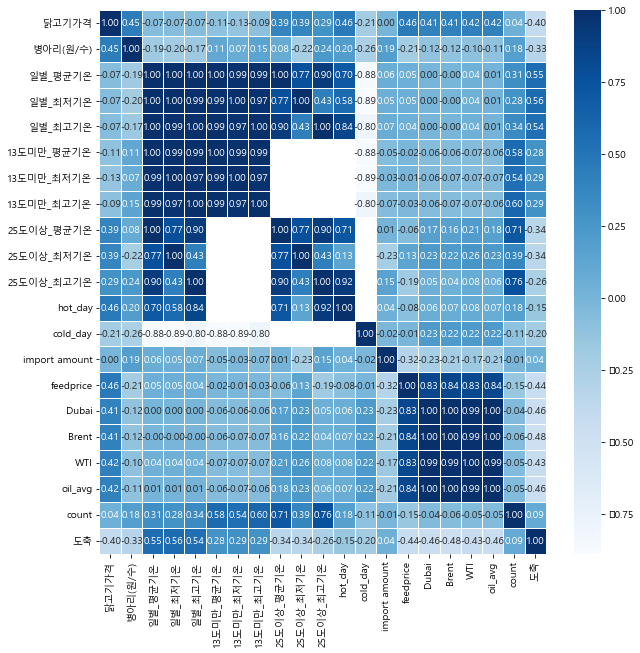

In [76]:
plt.rcParams['font.family']= "Malgun Gothic"
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_m_data,annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

plt.show()

## 일별 데이터 통합

In [77]:
# 일별 데이터 통합
daily_under_13 = pd.read_csv('./pre_data/일별_13도_미만_기온.csv')
daily_over_25 = pd.read_csv('./pre_data/일별_25도_이상_기온.csv')
daily_chicken = pd.read_csv('./pre_data/일별_닭고기가격.csv')
daily_chick = pd.read_csv('./pre_data/일별_병아리가격.csv')
daily_oil = pd.read_csv('./pre_data/일별_원유가격.csv')
daily_temp = pd.read_csv('./pre_data/일별_전국_평균기온.csv')

In [78]:
dfs = [daily_chicken,daily_chick,daily_oil,daily_temp,daily_under_13,daily_over_25]

import functools as ft
df_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)

C:\Users\admin\AppData\Local\Temp\ipykernel_9096\2091943728.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)
C:\Users\admin\AppData\Local\Temp\ipykernel_9096\2091943728.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = ft.reduce(lambda left,right : pd.merge(left,right, on='date',how='left'), dfs)


In [79]:
df_final.columns

Index(['Unnamed: 0_x', 'date', 'price', 'Unnamed: 0_y', '병아리(원/수)',
       'Unnamed: 0_x', 'Dubai', 'Brent', 'WTI', 'oil_avg', 'Unnamed: 0_y',
       '평균기온_x', '최저기온_x', '최고기온_x', 'Unnamed: 0_x', '평균기온_y', '최저기온_y',
       '최고기온_y', 'Unnamed: 0_y', '평균기온', '최저기온', '최고기온'],
      dtype='object')

In [80]:
df_final

,Unnamed: 0_x,date,price,Unnamed: 0_y,병아리(원/수),Unnamed: 0_x,Dubai,Brent,WTI,oil_avg,...,최저기온_x,최고기온_x,Unnamed: 0_x,평균기온_y,최저기온_y,최고기온_y,Unnamed: 0_y,평균기온,최저기온,최고기온
0,0,2021-12-31,4047,2994.0,400.0,2580.0,77.12,77.78,75.21,76.703333,...,-7.2,0.1,3652.0,-3.9,-7.2,0.1,NaN,NaN,NaN,NaN
1,1,2021-12-30,4047,2993.0,400.0,2579.0,77.24,79.32,76.99,77.850000,...,-3.3,2.7,3651.0,-0.7,-3.3,2.7,NaN,NaN,NaN,NaN
2,2,2021-12-29,3895,2992.0,400.0,2578.0,76.91,79.23,76.56,77.566667,...,-2.5,7.5,3650.0,2.5,-2.5,7.5,NaN,NaN,NaN,NaN
3,3,2021-12-28,3895,2991.0,400.0,2577.0,76.47,78.94,75.98,77.130000,...,-5.2,4.9,3649.0,0.0,-5.2,4.9,NaN,NaN,NaN,NaN
4,4,2021-12-27,3743,2990.0,400.0,2576.0,75.42,78.60,75.57,76.530000,...,-11.2,0.5,3648.0,-4.6,-11.2,0.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,2991,2012-01-06,3166,4.0,200.0,3.0,109.92,113.06,101.56,108.180000,...,-7.8,3.7,5.0,-2.6,-7.8,3.7,NaN,NaN,NaN,NaN
2992,2992,2012-01-05,3118,3.0,200.0,2.0,110.23,112.74,101.81,108.260000,...,-8.7,1.5,4.0,-4.1,-8.7,1.5,NaN,NaN,NaN,NaN
2993,2993,2012-01-04,3118,2.0,300.0,1.0,108.49,113.70,103.22,108.470000,...,-6.6,-1.0,3.0,-4.0,-6.6,-1.0,NaN,NaN,NaN,NaN
2994,2994,2012-01-03,3118,1.0,300.0,0.0,105.91,112.13,102.96,107.000000,...,-5.8,2.8,2.0,-1.9,-5.8,2.8,NaN,NaN,NaN,NaN


In [81]:
df_final.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],inplace=True)

In [82]:
df_final

,date,price,병아리(원/수),Dubai,Brent,WTI,oil_avg,평균기온_x,최저기온_x,최고기온_x,평균기온_y,최저기온_y,최고기온_y,평균기온,최저기온,최고기온
0,2021-12-31,4047,400.0,77.12,77.78,75.21,76.703333,-3.9,-7.2,0.1,-3.9,-7.2,0.1,NaN,NaN,NaN
1,2021-12-30,4047,400.0,77.24,79.32,76.99,77.850000,-0.7,-3.3,2.7,-0.7,-3.3,2.7,NaN,NaN,NaN
2,2021-12-29,3895,400.0,76.91,79.23,76.56,77.566667,2.5,-2.5,7.5,2.5,-2.5,7.5,NaN,NaN,NaN
3,2021-12-28,3895,400.0,76.47,78.94,75.98,77.130000,0.0,-5.2,4.9,0.0,-5.2,4.9,NaN,NaN,NaN
4,2021-12-27,3743,400.0,75.42,78.60,75.57,76.530000,-4.6,-11.2,0.5,-4.6,-11.2,0.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,2012-01-06,3166,200.0,109.92,113.06,101.56,108.180000,-2.6,-7.8,3.7,-2.6,-7.8,3.7,NaN,NaN,NaN
2992,2012-01-05,3118,200.0,110.23,112.74,101.81,108.260000,-4.1,-8.7,1.5,-4.1,-8.7,1.5,NaN,NaN,NaN
2993,2012-01-04,3118,300.0,108.49,113.70,103.22,108.470000,-4.0,-6.6,-1.0,-4.0,-6.6,-1.0,NaN,NaN,NaN
2994,2012-01-03,3118,300.0,105.91,112.13,102.96,107.000000,-1.9,-5.8,2.8,-1.9,-5.8,2.8,NaN,NaN,NaN


In [83]:
df_final.isnull().sum()

date           0
price          0
병아리(원/수)       1
Dubai        516
Brent        516
WTI          516
oil_avg      516
평균기온_x         0
최저기온_x         0
최고기온_x         0
평균기온_y      1567
최저기온_y      1567
최고기온_y      1567
평균기온        2666
최저기온        2666
최고기온        2666
dtype: int64

In [84]:
df_final = df_final.rename(columns={'평균기온_x':'일별_평균기온','최저기온_x':'일별_최저기온','최고기온_x':'일별_최고기온',
                        '평균기온_y':'13도미만_평균기온','최저기온_y':'13도미만_최저기온','최고기온_y':'13도미만_최고기온',
                        '평균기온': '25도이상_평균기온', '최저기온':'25도이상_최저기온', '최고기온':'25도이상_최고기온'})

In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 0 to 2995
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2996 non-null   object 
 1   price       2996 non-null   int64  
 2   병아리(원/수)    2995 non-null   float64
 3   Dubai       2480 non-null   float64
 4   Brent       2480 non-null   float64
 5   WTI         2480 non-null   float64
 6   oil_avg     2480 non-null   float64
 7   일별_평균기온     2996 non-null   float64
 8   일별_최저기온     2996 non-null   float64
 9   일별_최고기온     2996 non-null   float64
 10  13도미만_평균기온  1429 non-null   float64
 11  13도미만_최저기온  1429 non-null   float64
 12  13도미만_최고기온  1429 non-null   float64
 13  25도이상_평균기온  330 non-null    float64
 14  25도이상_최저기온  330 non-null    float64
 15  25도이상_최고기온  330 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 397.9+ KB


In [86]:
df_final.to_csv('./pre_data/일별_통합.csv')

In [87]:
corr_data = df_final.corr()
corr_data

,price,병아리(원/수),Dubai,Brent,WTI,oil_avg,일별_평균기온,일별_최저기온,일별_최고기온,13도미만_평균기온,13도미만_최저기온,13도미만_최고기온,25도이상_평균기온,25도이상_최저기온,25도이상_최고기온
price,1.000000,0.385245,0.357849,0.361242,0.366547,0.363031,-0.047706,-0.050609,-0.041482,-0.048003,-0.065649,-0.029241,0.160858,0.101831,0.160040
병아리(원/수),0.385245,1.000000,-0.105012,-0.104562,-0.090604,-0.100846,-0.172761,-0.188195,-0.154820,0.088330,0.059329,0.099269,0.078887,0.038323,0.086882
Dubai,0.357849,-0.105012,1.000000,0.997685,0.982587,0.997599,0.006709,0.010032,0.005125,-0.054556,-0.052282,-0.049027,0.012448,0.064728,-0.040226
Brent,0.361242,-0.104562,0.997685,1.000000,0.985005,0.998346,0.001973,0.005189,0.000344,-0.059196,-0.055993,-0.055048,0.012962,0.062640,-0.038947
WTI,0.366547,-0.090604,0.982587,0.985005,1.000000,0.992419,0.042335,0.046014,0.039554,-0.049720,-0.047351,-0.044201,0.015279,0.056003,-0.029557
oil_avg,0.363031,-0.100846,0.997599,0.998346,0.992419,1.000000,0.015952,0.019358,0.013980,-0.054965,-0.052326,-0.049906,0.013573,0.061422,-0.036498
일별_평균기온,-0.047706,-0.172761,0.006709,0.001973,0.042335,0.015952,1.000000,0.986472,0.986279,1.000000,0.952892,0.963612,1.000000,0.725875,0.888333
일별_최저기온,-0.050609,-0.188195,0.010032,0.005189,0.046014,0.019358,0.986472,1.000000,0.948987,0.952892,1.000000,0.850622,0.725875,1.000000,0.376600
일별_최고기온,-0.041482,-0.154820,0.005125,0.000344,0.039554,0.013980,0.986279,0.948987,1.000000,0.963612,0.850622,1.000000,0.888333,0.376600,1.000000
13도미만_평균기온,-0.048003,0.088330,-0.054556,-0.059196,-0.049720,-0.054965,1.000000,0.952892,0.963612,1.000000,0.952892,0.963612,NaN,NaN,NaN


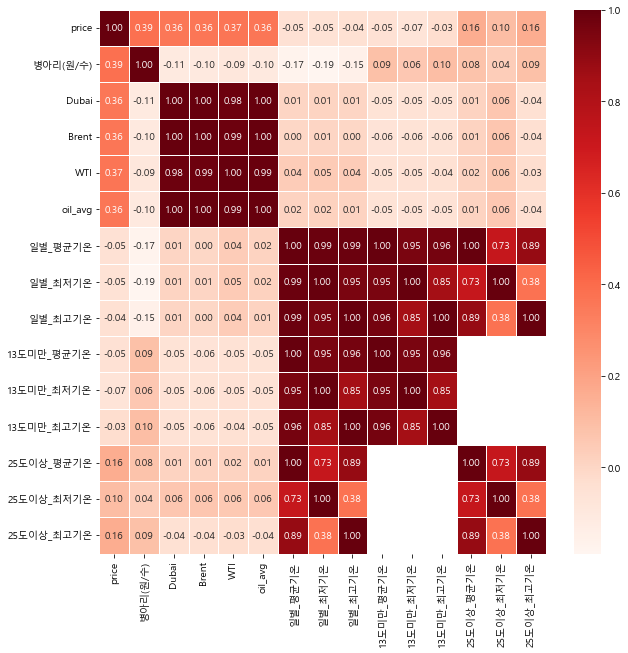

In [89]:
plt.rcParams['font.family']= "Malgun Gothic"
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_data,annot=True, fmt='.2f', linewidths=.5, cmap='Reds')

plt.show()

# 수도광열비 데이터 전처리

In [ ]:
electronic_fee = pd.read_csv('./data/축산현황_수도광열비_2012_2021.csv')
electronic_fee = electronic_fee[['시점','전국']]
electronic_fee.head()

,시점,전국
0,2012.1/4,69387033
1,2012.2/4,97750378
2,2012.3/4,68540002
3,2012.4/4,76129531
4,2013.1/4,71938194


In [ ]:
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.1/4','-03-31')
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.2/4','-06-30')
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.3/4','-09-30')
electronic_fee['시점'] = electronic_fee['시점'].str.replace('.4/4','-12-31')

C:\Users\admin\AppData\Local\Temp\ipykernel_10004\277759350.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  electronic_fee['시점'] = electronic_fee['시점'].str.replace('.2/4','-06-30')
C:\Users\admin\AppData\Local\Temp\ipykernel_10004\277759350.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  electronic_fee['시점'] = electronic_fee['시점'].str.replace('.3/4','-09-30')
C:\Users\admin\AppData\Local\Temp\ipykernel_10004\277759350.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  electronic_fee['시점'] = electronic_fee['시점'].str.replace('.4/4','-12-31')


In [ ]:
electronic_fee.rename(columns={'시점':'date','전국':'수도광열비'},inplace=True)

In [ ]:
electronic_fee['date'] = pd.to_datetime(electronic_fee['date'])
electronic_fee['수도광열비'] = electronic_fee['수도광열비'].astype('int')

In [ ]:
electronic_fee.head()

,date,수도광열비
0,2012-03-31,69387033
1,2012-06-30,97750378
2,2012-09-30,68540002
3,2012-12-31,76129531
4,2013-03-31,71938194


In [ ]:
quarterly_chicken_price = chicken_price.resample('Q',on='date').mean()
quarterly_chicken_price['price'] = quarterly_chicken_price['price'].astype('int')
quarterly_chicken_price.head()

,price
date,
2012-03-31,3693
2012-06-30,3382
2012-09-30,3582
2012-12-31,3460
2013-03-31,3710


In [ ]:
quarterly_chicken_price = quarterly_chicken_price.reset_index()
quarterly_chicken_price.head()

,date,price
0,2012-03-31,3693
1,2012-06-30,3382
2,2012-09-30,3582
3,2012-12-31,3460
4,2013-03-31,3710


In [ ]:
quarterly_df = pd.merge(electronic_fee,quarterly_chicken_price,on='date',how='left')
quarterly_df.head()

,date,수도광열비,price
0,2012-03-31,69387033,3693
1,2012-06-30,97750378,3382
2,2012-09-30,68540002,3582
3,2012-12-31,76129531,3460
4,2013-03-31,71938194,3710


In [ ]:
quarterly_df.corr()
# 분기별이라 데이터 간 관계가 의미 없게 나옴. 노쓸모

,수도광열비,price
수도광열비,1.000000,-0.467004
price,-0.467004,1.000000
